<a href="https://colab.research.google.com/github/RazinKabir007/Kronig-Penny-model-solution/blob/main/Assignment_Kronig_Penney_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib2tikz
!pip install tikzplotlib
!pip install tikzplotlib==0.9.5
!sudo apt-get install texlive-xetex

In [ ]:
!sudo tlmgr install cmbright
!pip install tikzplotlib


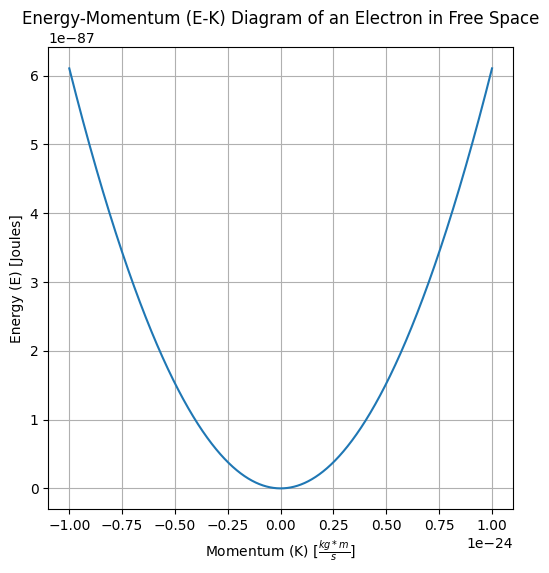

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h_cut = 1.0545718e-34  # Reduced Planck constant (J*s)
m_e = 9.10938356e-31  # Electron mass (kg)

# Generate a range of momentum values (both positive and negative)
K = np.linspace(-1e-24, 1e-24, 100000)

# Calculate corresponding energy values (E)
E = (h_cut**2 * K**2) / (2 * m_e)

# Create the E-K diagram plot
plt.figure(figsize=(6, 6))
plt.plot(K, E)
plt.xlabel(r'Momentum (K) [$\frac{kg*m}{s}$]')
plt.ylabel('Energy (E) [Joules]')
plt.title('Energy-Momentum (E-K) Diagram of an Electron in Free Space')
plt.grid(True)
plt.show()

<ipython-input-3-02fd36ad2512>:23: RuntimeWarning: divide by zero encountered in divide
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))
<ipython-input-3-02fd36ad2512>:23: RuntimeWarning: invalid value encountered in multiply
  return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))


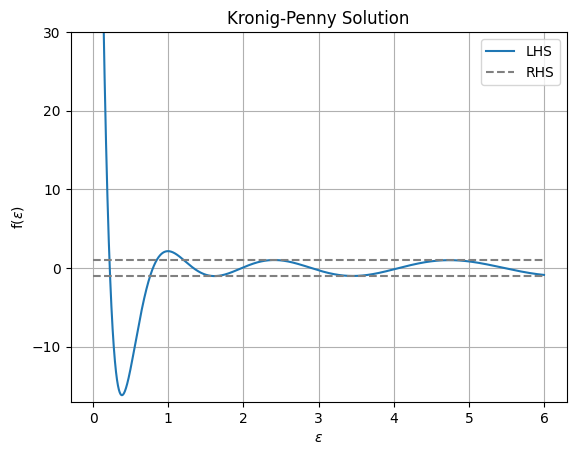

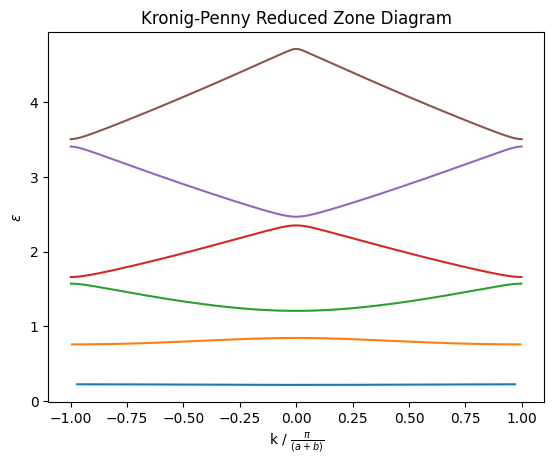

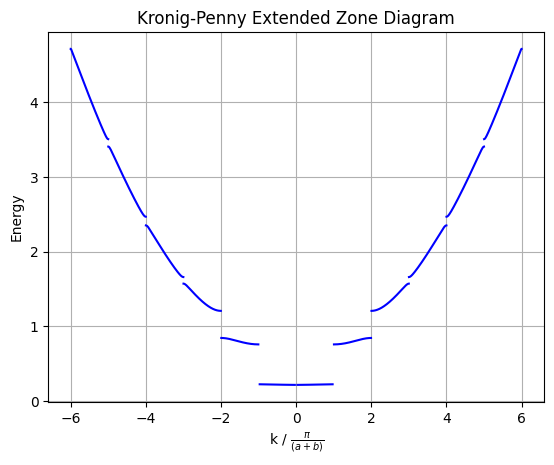

In [ ]:
#import libraries
import numpy as np
import matplotlib.pylab as plt

#Constants:
h_cut = 1.054*1e-34    #J*s
m = 9.109*1e-31        #kg


#System Variables
a = 4         #Angstroms
b = 4       #Angstroms
V0 = 5          #eV
eps_rng = 6

def kp_sol(a,b,V0,eps_rng):  #input a, b spacing in Angstoms, V0 = potential in eV, and total desired range to output
    alpha_0 = (2*m*V0*1.602*1e-19/h_cut**2)**(1/2)  #m^-1

    #Kronig-Penny Solution,  with epsilon = E/V0:
    def kp_p(eps):  #for epsilon > 1
        return (1-2*eps)/(2*(eps*(eps-1))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sin(alpha_0*b*1e-10*(eps-1)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cos(alpha_0*b*1e-10*(eps-1)**(1/2))
    def kp_m(eps):  #for epison < 1
        return (1-2*eps)/(2*(eps*(1-eps))**(1/2))*np.sin(alpha_0*a*1e-10*eps**(1/2))*np.sinh(alpha_0*b*1e-10*(1-eps)**(1/2))+np.cos(alpha_0*a*1e-10*eps**(1/2))*np.cosh(alpha_0*b*1e-10*(1-eps)**(1/2))

    #Define epsilon space to plot
    eps_list = np.linspace(0,eps_rng,200000)
    feps = np.piecewise(eps_list, [eps_list < 1, eps_list > 1], [kp_m, kp_p])

    return eps_list, feps

def eband_kp(eps_list,feps): #outputs energy band data
    k=[]
    band_list=[]
    Eps=[]
    epsbuildlist=[]
    for i in range(len(feps)-1):
       if 1 >= feps[i] >= -1:
           band_list.append(feps[i])
           epsbuildlist.append(eps_list[i])
           if (1 < feps[i+1] or  -1 > feps[i+1]):
               k.append(band_list)
               Eps.append(epsbuildlist)
               band_list=[]
               epsbuildlist=[]

    for i in range(len(k)):
        k[i]=np.arccos(k[i])/np.pi

    return k, Eps


eps_list, feps = kp_sol(a,b,V0,eps_rng)
k, eps = eband_kp(eps_list, feps)

#shifting the graph to get k values from -6 to 6
for i in range(len(k[1])):
  k[1][i] = k[1][i] - 2

for i in range(len(k[2])):
  k[2][i] = k[2][i] + 2

for i in range(len(k[3])):
  k[3][i] = k[3][i] - 4

for i in range(len(k[4])):
  k[4][i] = k[4][i] + 4

for i in range(len(k[5])):
  k[5][i] = k[5][i] - 6

#For reduced zone
k_r, eps_r = eband_kp(eps_list, feps)

#Mirroring the graph to get both positive and negative k values
for i in range(len(k)):
        if i % 2 == 0:
            eps_r[i]=np.concatenate((eps_r[i][::-1],eps_r[i][::1]))
            k_r[i]=np.concatenate((-1*np.array(k_r[i],dtype=float)[::-1],k_r[i][::1]))
        else:
            k_r[i]=np.concatenate((k_r[i][::1],-1*np.array(k_r[i],dtype=float)[::-1]))
            eps_r[i]=np.concatenate((eps_r[i][::1],eps_r[i][::-1]))



#k values to plot for the RHS Solution
klist=np.linspace(0,eps_rng,10)
k_min=klist*0-1
k_max=klist*0+1

#Plot Kronig-Penny Solution
plt.figure(1,dpi=100)
plt.title("Kronig-Penny Solution")
plt.xlabel("$\epsilon$")
plt.ylabel("f($\epsilon$)")
plt.ylim(-17,30)
plt.plot(eps_list,feps,label="LHS")
plt.plot(klist,k_min, linestyle="dashed",color="grey",label="RHS")
plt.plot(klist,k_max, linestyle="dashed",color="grey")
plt.legend()
plt.grid(True)

#ploting reduced zone diagram
plt.figure(2,dpi=100)
plt.title("Kronig-Penny Reduced Zone Diagram")
plt.xlabel(r'k / $\frac{\pi}{(a+b)}$')
plt.ylabel("$\epsilon$")
for i in range(len(k)):
    plt.plot(k_r[i],eps_r[i])

#ploting extended zone diagram
plt.figure(3,dpi=100)
plt.title("Kronig-Penny Extended Zone Diagram")
plt.xlabel(r'k / $\frac{\pi}{(a+b)}$')
plt.ylabel("Energy")
plt.grid(True)
for i in range(len(k)):
    plt.plot(k[i],eps[i], color = 'blue')
for i in range(len(k)):
    k[i] = - k[i]
    plt.plot(k[i],eps[i], color = 'blue')